# PORTER : Neural Network Regression

Problem Statement

Porter works with a wide range of restaurants for delivering their items directly to the people.
Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.
Using the  data train a NN regression model that will do the delivery time estimation, based on all the features.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [ ]:
!gdown 1Foo7f8l2VfbMHfCyx5_lWx9JM-a5pKQC

Downloading...
From: https://drive.google.com/uc?id=1Foo7f8l2VfbMHfCyx5_lWx9JM-a5pKQC
To: /content/dataset.csv
100% 23.8M/23.8M [00:00<00:00, 171MB/s]


In [ ]:
data = pd.read_csv('dataset.csv')

In [ ]:
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


Data Fields

* market_id : integer id for the market where the restaurant lies
* created_at : the timestamp at which the order was placed
* actual_delivery_time : the timestamp when the order was delivered
* store_primary_category : category for the restaurant
* order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
* total_items subtotal : final price of the order
* num_distinct_items : the number of distinct items in the order
* min_item_price : price of the cheapest item in the order
* max_item_price : price of the costliest item in order
* total_onshift_partners : number of delivery partners on duty at the time order was placed
* total_busy_partners : number of delivery partners attending to other tasks
* total_outstanding_orders : total number of orders to be fulfilled at the moment

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
data.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [ ]:
data['store_primary_category'].value_counts()

,count
store_primary_category,
american,19399
pizza,17321
mexican,17099
burger,10958
sandwich,10060
...,...
lebanese,9
belgian,2
indonesian,2


In [ ]:
data.isnull().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [ ]:
data[data['actual_delivery_time'].isnull()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
109,3.0,2015-02-10 21:51:54,NaN,da353f402faf6cf475d4abd1450b0882,sandwich,3.0,1,1125,1,975,975,7.0,5.0,4.0
7670,2.0,2015-02-08 02:54:42,NaN,140f6969d5213fd0ece03148e62e461e,japanese,2.0,4,2860,3,390,690,131.0,123.0,197.0
78511,4.0,2015-02-15 02:15:45,NaN,1f0e3dad99908345f7439f8ffabdffc4,catering,1.0,9,5050,6,375,1125,91.0,75.0,167.0
115982,4.0,2015-02-16 01:52:49,NaN,b92894e4589f652dc3116cb3a8c48c08,pizza,3.0,2,2094,2,599,1195,53.0,53.0,102.0
140635,2.0,2015-02-15 02:21:42,NaN,0d73a25092e5c1c9769a9f3255caa65a,dessert,1.0,3,4210,3,865,1850,123.0,91.0,176.0
158967,2.0,2015-02-01 01:21:29,NaN,faacbcd5bf1d018912c116bf2783e9a1,mexican,5.0,5,3447,3,225,1349,90.0,88.0,109.0
170416,5.0,2015-02-01 01:36:33,NaN,6c7a107981f9c2a0ed55efce297bd1e2,fast,4.0,3,982,3,165,575,41.0,31.0,31.0


In [ ]:
data[data['total_onshift_partners'].isnull()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
160,6.0,2015-02-06 01:11:56,2015-02-06 01:42:51,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,2,575,2,225,350,NaN,NaN,NaN
161,6.0,2015-02-14 02:07:47,2015-02-14 03:17:37,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,5,1415,3,185,675,NaN,NaN,NaN
162,6.0,2015-01-31 21:58:30,2015-01-31 22:55:32,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,1,650,1,650,650,NaN,NaN,NaN
163,6.0,2015-02-08 03:28:59,2015-02-08 05:32:11,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,5,1550,5,225,700,NaN,NaN,NaN
164,6.0,2015-01-23 19:29:17,2015-01-23 20:25:25,45d38ce7f5231602e24a2103a0300ae6,breakfast,2.0,6,1110,5,185,185,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197196,3.0,2015-02-10 19:55:29,2015-02-10 20:33:13,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,3,1792,3,163,1177,NaN,NaN,NaN
197197,3.0,2015-02-06 03:05:38,2015-02-06 03:58:16,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,8,2923,5,50,1199,NaN,NaN,NaN
197198,3.0,2015-01-23 03:57:56,2015-01-23 04:43:17,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,3,3297,3,799,1299,NaN,NaN,NaN
197199,3.0,2015-01-24 03:15:41,2015-01-24 04:04:19,084afd913ab1e6ea58b8ca73f6cb41a6,indian,2.0,4,2776,4,179,1099,NaN,NaN,NaN


Removing the NAN's

In [ ]:
data.dropna(subset=[
    'total_onshift_partners',
    'total_busy_partners',
    'total_outstanding_orders',
    'market_id',
    'actual_delivery_time',
    'order_protocol',
    'store_primary_category'
], inplace=True)


In [ ]:
data.isna().sum()

,0
market_id,0
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [ ]:
# #Filling store_primary_category,market_id,order_protocol with the mode of the column
# data['store_primary_category'].fillna(data['store_primary_category'].mode()[0], inplace=True)
# data['market_id'].fillna(data['market_id'].mode()[0], inplace=True)
# data['order_protocol'].fillna(data['order_protocol'].mode()[0], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   created_at                176248 non-null  object 
 2   actual_delivery_time      176248 non-null  object 
 3   store_id                  176248 non-null  object 
 4   store_primary_category    176248 non-null  object 
 5   order_protocol            176248 non-null  float64
 6   total_items               176248 non-null  int64  
 7   subtotal                  176248 non-null  int64  
 8   num_distinct_items        176248 non-null  int64  
 9   min_item_price            176248 non-null  int64  
 10  max_item_price            176248 non-null  int64  
 11  total_onshift_partners    176248 non-null  float64
 12  total_busy_partners       176248 non-null  float64
 13  total_outstanding_orders  176248 non-null  float6

Feature Engineering

In [ ]:
data['actual_delivery_time']=pd.to_datetime(data['actual_delivery_time'])
data['created_at']=pd.to_datetime(data['created_at'])

In [ ]:
#Fill missing values in actual_delivery_time with the mean of the column
# data['actual_delivery_time'].interpolate(method='linear',inplace=True)

In [ ]:
data['price'] = data['subtotal']* data['total_items']

In [ ]:
original_categories = data['store_primary_category'].astype('category').cat.categories

# Encoding the store type column
data['store_primary_category'] = data['store_primary_category'].astype('category').cat.codes

In [ ]:
#knn imputation
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(missing_values=np.nan,n_neighbors=5)
# cols = ['store_primary_category', 'market_id', 'order_protocol']

# data[cols] = imputer.fit_transform(data[cols])

In [ ]:
data['target'] = (data['actual_delivery_time']-data['created_at']).dt.total_seconds()/60
data['hour_of_order'] = data['created_at'].dt.hour
data['dayofweek_of_order'] = data['created_at'].dt.dayofweek

In [ ]:
data.target.head()

,target
0,62.983333
1,67.066667
8,26.433333
14,37.883333
15,49.800000


In [ ]:
data[['target','hour_of_order','dayofweek_of_order']].head()

,target,hour_of_order,dayofweek_of_order
0,62.983333,22,4
1,67.066667,21,1
8,26.433333,0,0
14,37.883333,3,3
15,49.800000,2,1


In [ ]:
#Dropping the unnecessary columns
data.drop(['actual_delivery_time','created_at','store_id'],axis=1,inplace=True)

## EDA

### Store category v/s Time Taken to Deliver

Highest Category: (63, 56.425203252032524)
Lowest Category: (21, 34.13333333333333)


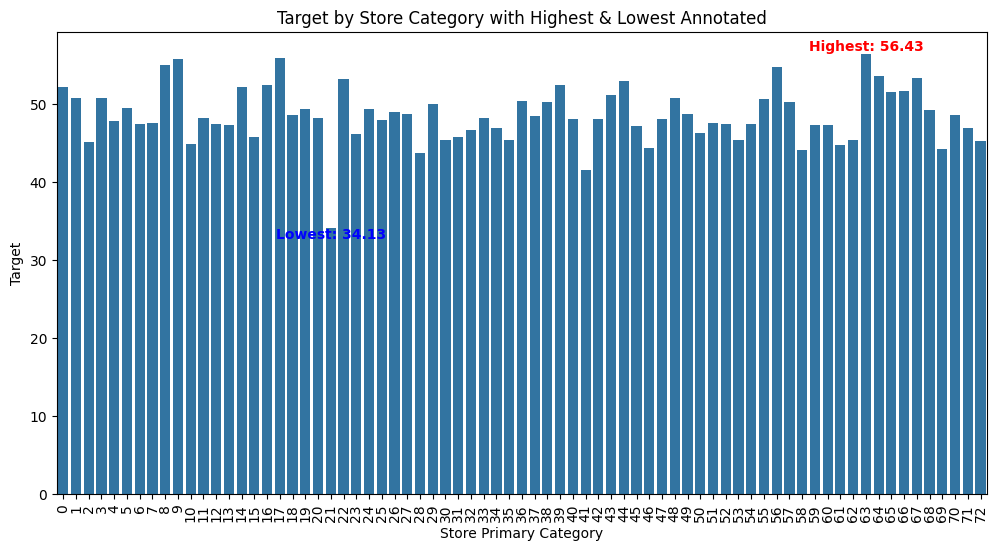

In [ ]:
category_means = data.groupby("store_primary_category")["target"].mean()

#To find the category with the highest and lowest mean target values
highest_category = category_means.idxmax(), category_means.max()
lowest_category = category_means.idxmin(), category_means.min()

print("Highest Category:", highest_category)
print("Lowest Category:", lowest_category)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=category_means.index, y=category_means.values, ci=None)

# Annotate highest point
ax.text(highest_category[0], highest_category[1], f'Highest: {highest_category[1]:.2f}',
        ha='center', va='bottom', fontsize=10, color='red', fontweight='bold')

# Annotate lowest point
ax.text(lowest_category[0], lowest_category[1], f'Lowest: {lowest_category[1]:.2f}',
        ha='center', va='top', fontsize=10, color='blue', fontweight='bold')

plt.xticks(rotation=90)
plt.xlabel("Store Primary Category")
plt.ylabel("Target")
plt.title("Target by Store Category with Highest & Lowest Annotated")

plt.show()

In [ ]:
original_categories[63], original_categories[21]

('southern', 'chocolate')

* Southern cusine takes the highest delivery time , while chocolate category is the quickest to deliver

### Price v/s Minutes Taken to deliver

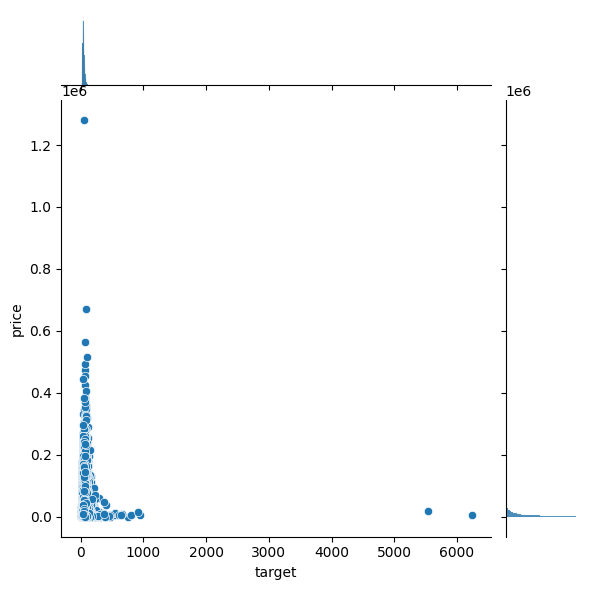

In [ ]:
sns.jointplot(data=data,x='target',y='price')
plt.show()

Inference

* The price is spread across a wide range with a high concentration of data points below 10000
* The target variable is distributed somewhat evenly across its range, though slightly denser in the lower target values.
* Some data points exist at extreme price values (~40,000+) and low target values, which might need further investigation.
* There doesn't appear to be a strong correlation between price and target, as the points are widely dispersed.


### Market v/s Time taken to Deliver

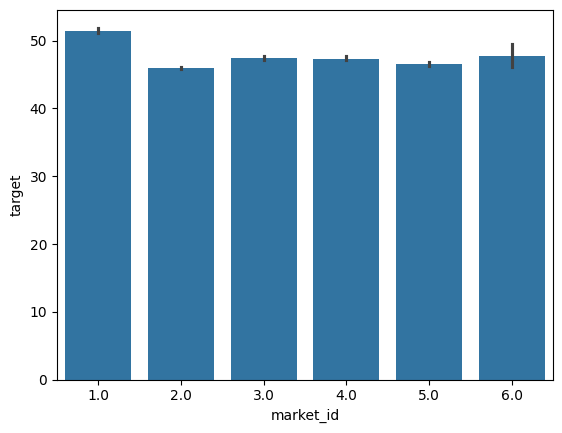

In [ ]:
sns.barplot(x='market_id',y='target',data=data)
plt.show()

### Store Category v/s totalitems

Highest Category: (41, 5.627450980392157)
Lowest Category: (3, 1.0)


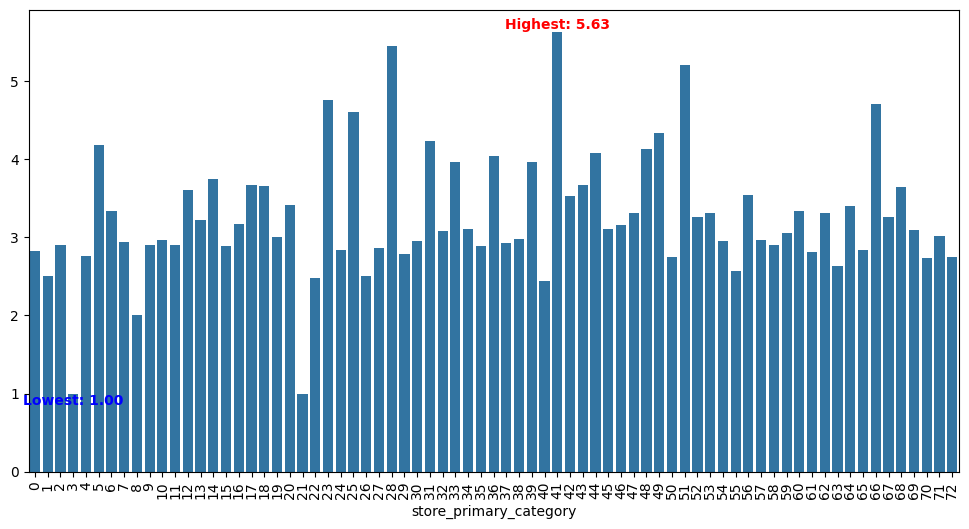

In [ ]:
category_mean = data.groupby("store_primary_category")["total_items"].mean()
highest_category = category_mean.idxmax(), category_mean.max()
lowest_category = category_mean.idxmin(), category_mean.min()

print("Highest Category:", highest_category)
print("Lowest Category:", lowest_category)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=category_mean.index, y=category_mean.values, ci=None)

# Annotate highest point
ax.text(highest_category[0], highest_category[1], f'Highest: {highest_category[1]:.2f}',
        ha='center', va='bottom', fontsize=10, color='red', fontweight='bold')

# Annotate lowest point
ax.text(lowest_category[0], lowest_category[1], f'Lowest: {lowest_category[1]:.2f}',
        ha='center', va='top', fontsize=10, color='blue', fontweight='bold')

plt.xticks(rotation=90)
plt.show()

In [ ]:
original_categories[3],original_categories[41]

('alcohol-plus-food', 'kosher')

Inference
* Customers ordering from Kosher stores tend to have the highest average total items in their orders.
* The Alcohol plus Food category has the lowest average total items per order.
* This suggests that customers ordering alcohol with food generally purchase fewer items per order, possibly because alcohol purchases are often separate from large food orders.

### Order Distribution by Day of Week and Hour

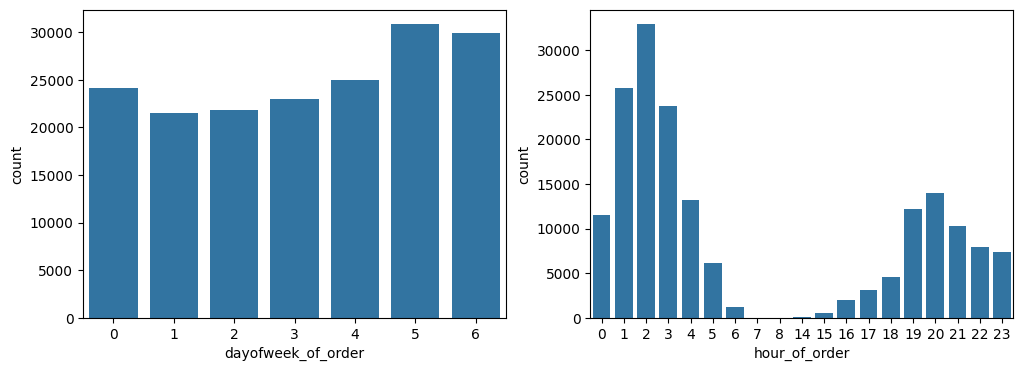

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(x=data['dayofweek_of_order'])
plt.subplot(122)
sns.countplot(x=data['hour_of_order'])
plt.show()

Inference

* Lowest orders occur on Tuesday (day 1).
* Weekends have the highest number of orders, likely due to increased consumer activity.
* Low activity from 4 AM - 8 AM, suggesting fewer orders during early morning hours.
* Another rise in orders from 5 PM - 10 PM, possibly indicating people placing orders after work.

### Order Protocol Distribution

<Axes: xlabel='order_protocol', ylabel='total_items'>

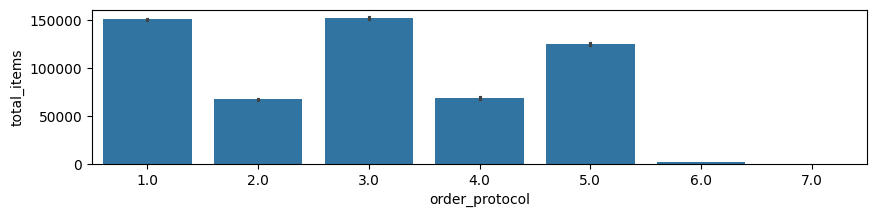

In [ ]:
plt.figure(figsize=(10,2))
sns.barplot(y='total_items',x='order_protocol',data=data,estimator='sum')

Inference

* Order protocol 1 nd 3 seems to be the go to method to book a porter service
* 6 is the least sought after approach to book porter

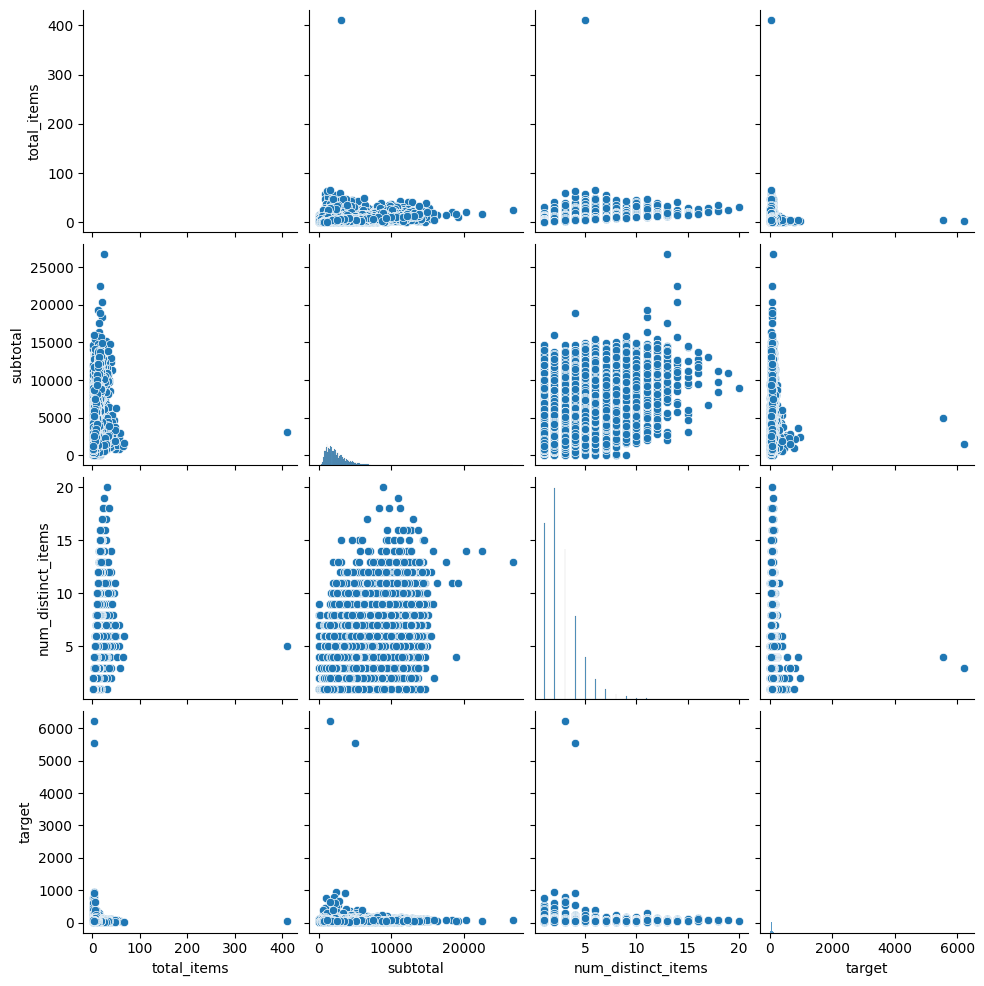

In [ ]:
sns.pairplot(data[['total_items','subtotal','num_distinct_items','target']])
plt.show()

Inference :

 * Features  subtotal, target, and total_items show right-skewed distributions with outliers.
 * Subtotal vs. total_items and subtotal vs. num_distinct_items show non-linear patterns.
 * Column num_distinct_items has discrete values forming vertical clusters in scatter plots.
 * Subtotal has a strong positive association with total_items, while target is mostly concentrated near zero.
 * A few extreme outliers exist, especially in subtotal and target.

### Correlation between Features

<Axes: >

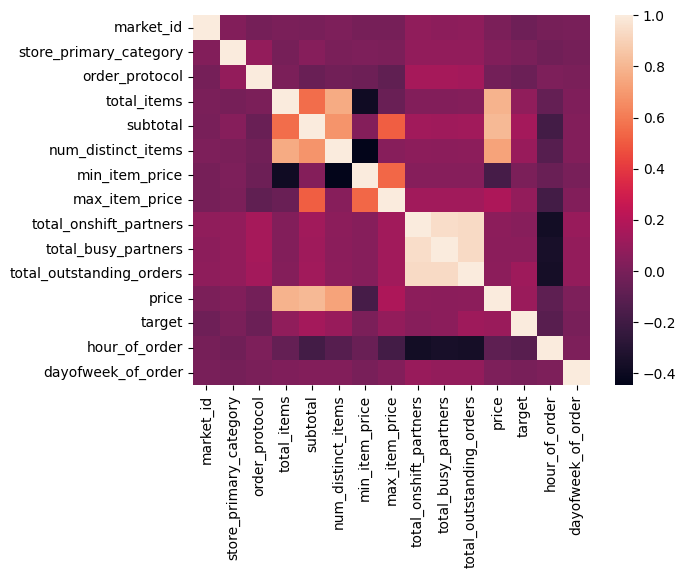

In [ ]:
sns.heatmap(data.corr())

Inference

* Strong Correlation Between total_items and subtotal indicating that a higher number of items leads to a higher order subtotal.
* There is inimal Correlation of order_protocol with Key Metrics .
* There is a positive relationship between total_onshift_partners, total_busy_partners, and total_outstanding_orders suggesting that as more partners are on shift, more orders are being processed.
* High Correlation Between max_item_price and subtotal showing that higher-priced items contribute significantly to the order subtotal.
* Weak Correlation of dayofweek_of_order with Other Variables suggesting that order patterns remain fairly consistent across different days of the week.
* Some Negative Correlations Indicating Possible Trade-offs – A few black/dark patches suggest inverse relationships, likely in operational constraints or customer behavior patterns.

### Outliers in Target

<Axes: ylabel='target'>

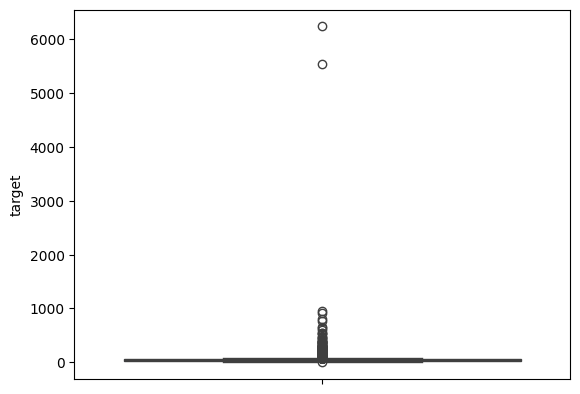

In [ ]:
sns.boxplot(data['target'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176248 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   store_primary_category    176248 non-null  int8   
 2   order_protocol            176248 non-null  float64
 3   total_items               176248 non-null  int64  
 4   subtotal                  176248 non-null  int64  
 5   num_distinct_items        176248 non-null  int64  
 6   min_item_price            176248 non-null  int64  
 7   max_item_price            176248 non-null  int64  
 8   total_onshift_partners    176248 non-null  float64
 9   total_busy_partners       176248 non-null  float64
 10  total_outstanding_orders  176248 non-null  float64
 11  price                     176248 non-null  int64  
 12  target                    176248 non-null  float64
 13  hour_of_order             176248 non-null  int32 

### Data Preprocessing

In [ ]:
#Outlier removal through IQR for all the columns
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


<Axes: ylabel='target'>

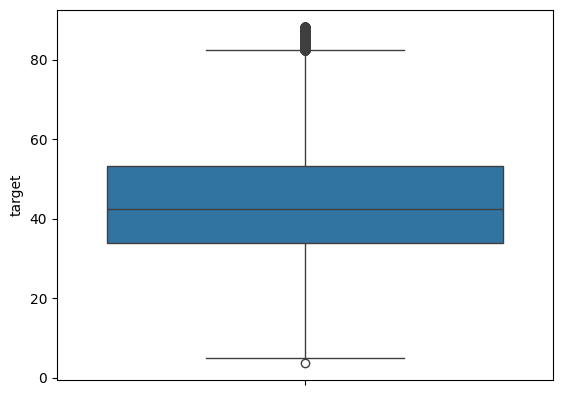

In [ ]:
sns.boxplot(data['target'])

In [ ]:
data['subtotal'].value_counts()

,count
subtotal,
1500,778
1095,730
1700,726
1800,720
1300,692
...,...
643,1
6043,1
3976,1


In [ ]:
#one-hot encoding order_protocol
data = pd.get_dummies(data, columns=['order_protocol'])

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = data.drop(['target'],axis=1)
y = data['target']

scaler = preprocessing.StandardScaler()

In [ ]:

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [ ]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [ ]:
# from sklearn.ensemble import IsolationForest

# iso_forest = IsolationForest(contamination=0.02, random_state=42)  # Try reducing contamination
# outliers = iso_forest.fit_predict(X_train)
# X_train_filtered = X_train[outliers == 1]
# y_train_filtered = y_train[outliers == 1]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

### Creating Baseline Model

In [ ]:
#Bulid a baseline model


# Define the model
def create_baseline():
    model = Sequential([
        Dense(32, input_dim=X_train.shape[1], activation="relu", kernel_initializer='random_normal'),
        Dense(64, activation="relu", kernel_initializer='random_normal'),
        Dense(32, activation="relu", kernel_initializer='random_normal'),
        Dense(1, activation='linear')
    ])
    return model

# Create model
baseline_model = create_baseline()

# Compile model with Mean Squared Error (MSE)
baseline_model.compile(loss="mse", optimizer=Adam(), metrics=["mae","r2_score"])  # MAE is for evaluation

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = baseline_model.fit(
    X_train, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop], verbose=0
)


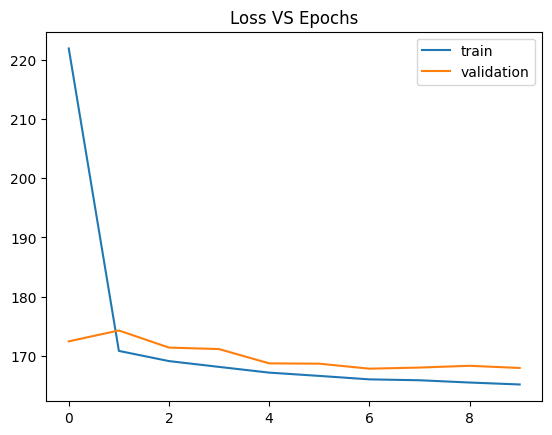

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()


In [ ]:
baseline_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,693 (57.40 KB)

 Trainable params: 4,897 (19.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,796 (38.27 KB)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

y_pred_base_model = baseline_model.predict(X_test)
mse_base_model = mean_squared_error(y_test,y_pred_base_model)
mae_base_model = mean_absolute_error(y_test,y_pred_base_model)
rmse_base_model = np.sqrt(mse_base_model)
r2_base_model = r2_score(y_test,y_pred_base_model)
print('R2 Score :',r2_base_model)
print('Mean Squared Error :',mse_base_model)
print('Mean Absolute Error :',mae_base_model)
print('Root Mean Squared Error :',rmse_base_model)

446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
R2 Score : 0.22141743335849484
Mean Squared Error : 165.37484865307434
Mean Absolute Error : 10.149968684668819
Root Mean Squared Error : 12.85981526512237


### Using keras tuner and building a tuned model

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()

    # Input Layer with LeakyReLU
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=256, step=32),
                    input_dim=X_train.shape[1], kernel_initializer='random_normal'))  # No activation yet
    model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation
    model.add(Dropout(hp.Float('dropout_1', 0.1, 0.3, step=0.1)))  # Dropout layer

    # Add multiple hidden layers dynamically
    for i in range(hp.Int('num_layers', 1, 3)):  # Choose 1 to 3 hidden layers
        model.add(Dense(hp.Int(f'units_{i+2}', min_value=32, max_value=256, step=32), kernel_initializer='random_normal'))  # Dense layer
        model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation
        model.add(Dropout(hp.Float(f'dropout_{i+2}', 0.1, 0.3, step=0.1)))  # Dropout layer

    # Output layer for regression (Linear activation)
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss='mse',
        metrics=['mae','r2_score']
    )

    return model

# Initialize Hyperband tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=20,
    factor=3,
    directory='kt_search',
    project_name='linear_regression_tuning'
)

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Run the tuner
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stop])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stop])

# Evaluate the best model
val_loss, val_mae,val_r2_score = best_model.evaluate(X_val, y_val)
print(f"Best Model Validation Loss: {val_loss:.4f}, MAE: {val_mae:.4f} ,R2_Score :{val_r2_score:.4f}")


Reloading Tuner from kt_search/linear_regression_tuning/tuner0.json
Epoch 1/50
3209/3209 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 320.9077 - mae: 13.2793 - r2_score: -0.5182 - val_loss: 172.2448 - val_mae: 10.4412 - val_r2_score: 0.1853
Epoch 2/50
3209/3209 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 180.9019 - mae: 10.6077 - r2_score: 0.1269 - val_loss: 173.9370 - val_mae: 10.2699 - val_r2_score: 0.1773
Epoch 3/50
3209/3209 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 176.1965 - mae: 10.4845 - r2_score: 0.1574 - val_loss: 169.6814 - val_mae: 10.2687 - val_r2_score: 0.1975
Epoch 4/50
3209/3209 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 174.7271 - mae: 10.4528 - r2_score: 0.1652 - val_loss: 169.1068 - val_mae: 10.2526 - val_r2_score: 0.2002
Epoch 5/50
3209/3209 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 170.6138 - mae: 10.3067 - r2_score: 0.1805 - val_loss: 169.1474 - val_mae: 10.2409 - val_r2_score: 0.2000
Epoch 6/50
3209/3209 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 171.1127 - mae: 10.3340

In [ ]:
best_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 256)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 96)                  │           6,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,461 (622.90 KB)

 Trainable params: 53,153 (207.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 106,308 (415.27 KB)

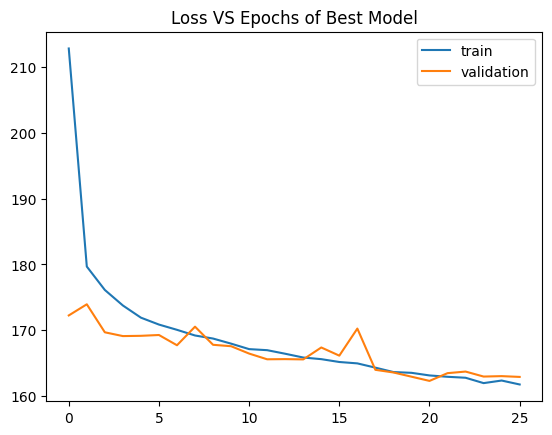

In [ ]:
#Loss v/s epoch
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs of Best Model")

plt.show()

In [ ]:
#Keras hyperband tuned model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print('R2 Score :',r2)
print('Mean Squared Error :',mse)
print('Mean Absolute Error :',mae)
print('Root Mean Squared Error :',rmse)

446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
R2 Score : 0.2437643027849451
Mean Squared Error : 160.6282613191059
Mean Absolute Error : 9.98205655065488
Root Mean Squared Error : 12.673920518888616


### Leading Questions

1. Defining the problem statements and where can this and modifications of this be used?

* Delivery Time Estimation for Porter Porter, India’s largest marketplace for intra-city logistics, aims to improve the lives of its 150,000+ driver-partners by providing consistent earnings and independence.

* The company has serviced over 5 million customers and collaborates with various restaurants for direct food delivery. To enhance customer experience, Porter wants to estimate delivery times accurately. The goal is to develop a regression model that predicts delivery times based on factors such as the type of food ordered, the restaurant’s location, and available delivery partners.

2. List 3 functions the pandas datetime provides with one line explanation.

* pd.to_datetime(): Converts a column or an array of date-like strings into pandas datetime objects.
* dt accessor: Provides access to various datetime components (e.g., year, month, day, hour) for a pandas Series with datetime data.
* pd.date_range(): Generates a range of dates based on specified start and end dates, with optional frequency (daily, monthly, etc.).

3. Short note on datetime, timedelta, time span (period)

* Datetime refers to a specific point in time, including both date and time components.
* A timedelta represents a duration or difference between two datetime points.
* A time span (or period) represents a fixed duration, often used for frequency-based calculations.

4. Why do we need to check for outliers in our data?

* Affects Model Performance – Outliers can skew regression models and reduce accuracy.
* Distorts Statistical Metrics – Mean, standard deviation, and correlation can be heavily influenced by extreme values.
* Impacts Data Distribution – Outliers can make assumptions of normality invalid, affecting statistical tests.
* Potential Data Entry Errors – Some outliers may be due to incorrect data entry or measurement errors.

5. Name 3 outlier removal methods?

* IQR
* Isolation Forest
* Z score

6. What classical machine learning methods can we use for this problem?

* Linear Regression
* RandomForest
* Decision Tree

7. Why is scaling required for neural networks?

* Scaling improves convergence, stability, and overall performance of NNs by making features comparable in magnitude.

8. Briefly explain your choice of optimizer.

* Adam:
  * Updates the weights based on a random batch of the dataset.
  * Uses both the Momentum and RMSprop techniques to reduce training time and variance.
  * Removes biasness so to have a better moving average at the starting.

9. Which activation function did you use and why?

* The Rectified Linear Unit (ReLU) is a widely used activation function in neural networks.
* To­ reduce p­ossibility ­of vanishing Gradient and faster c­onvergence.
* Also User LeakyRelu which is an activation function based on ReLu

10. Why does a neural network perform well on a large dataset?

* Neural networks thrive on large datasets because of their capacity for complexity, non-linearity, and feature extraction. The abundance of training examples enables them to learn meaningful representations and achieve impressive results.